# Bar Charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

In [2]:
age_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

sal_code_y = [38496, 42000, 46752, 49320, 53200,56000, 62316, 64928, 67317, 68748, 73752]

py_code_y = [45372, 48876, 53850, 57287, 63016,65998, 70003, 70000, 71496, 75370, 83640]

js_code_y = [37810, 43515, 46823, 49293, 53437,56373, 62375, 66674, 68745, 68746, 74583]

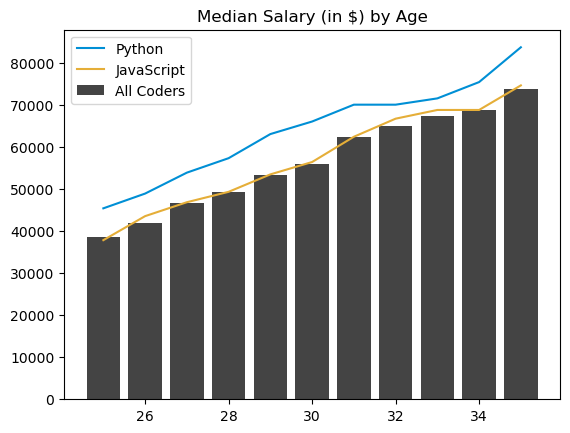

In [3]:
# Bar Chart

plt.bar(age_x,sal_code_y,color='#444444',label='All Coders')
plt.plot(age_x,py_code_y, color="#008fd5", label="Python")
plt.plot(age_x,js_code_y, color="#e5ae38", label="JavaScript")

plt.legend()

plt.title('Median Salary (in $) by Age')

plt.show()

### Multi side-by-side bar chart

#### XIndex and width of bar

XIndex
[ 0  1  2  3  4  5  6  7  8  9 10]



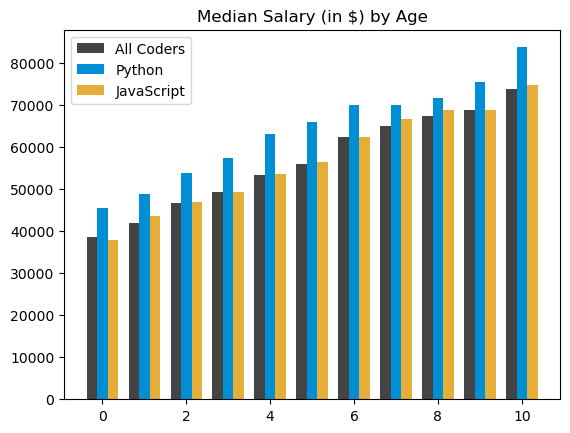

In [4]:
# Multiple bar chart

# For Multi side-by-side bar chart

# offsetting the x values each time the data is passed

# XIndex
x_indexes = np.arange(len(age_x))
print('XIndex')
print(x_indexes)
print()

# Shifting the bars by dabbling the width to present it side-by-side
w = 0.25

plt.bar(x_indexes - w, sal_code_y,width=w, color='#444444',label='All Coders')
plt.bar(x_indexes, py_code_y,width=w, color="#008fd5", label="Python")
plt.bar(x_indexes + w, js_code_y,width=w, color="#e5ae38", label="JavaScript")

plt.legend()

plt.title('Median Salary (in $) by Age')

plt.show()

#### Labels

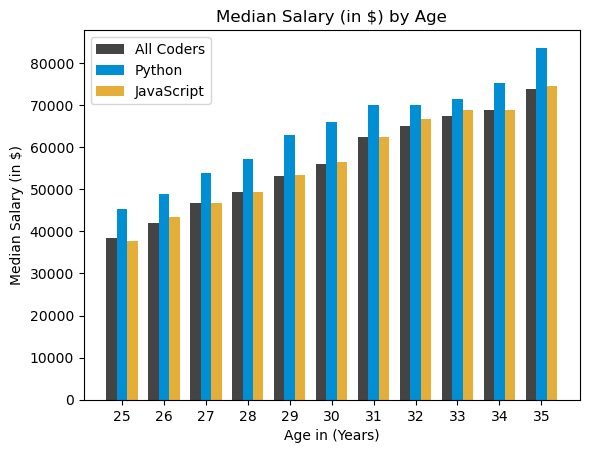

In [5]:
x_indexes = np.arange(len(age_x))

w = 0.25

plt.bar(x_indexes - w, sal_code_y,width=w, color='#444444',label='All Coders')
plt.bar(x_indexes, py_code_y,width=w, color="#008fd5", label="Python")
plt.bar(x_indexes + w, js_code_y,width=w, color="#e5ae38", label="JavaScript")

plt.legend()

plt.xticks(ticks = x_indexes, labels = age_x)

plt.title('Median Salary (in $) by Age')
plt.xlabel('Age in (Years)')
plt.ylabel('Median Salary (in $)')

plt.show()

#### Working with csv files

In [6]:
# An alternate way to open the csv file, but pandas is pretty easy 

with open('data.csv') as csv_file: # context manager
    csv_reader = csv.DictReader(csv_file)
    
    language_counter = Counter()
    
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
        
print(language_counter)
# Since it's a counter it prints out the result in descending sorted form.

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [7]:
print(language_counter.most_common(15))

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


In [8]:
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

In [9]:
print('languages')
print(languages)
print()
print('popularity')
print(popularity)

languages
['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']

popularity
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


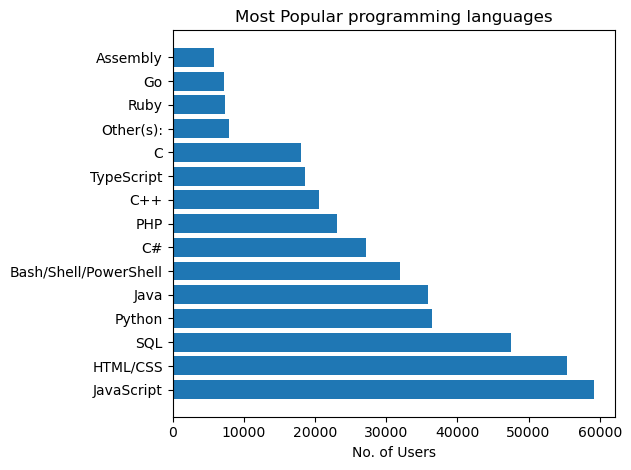

In [10]:
# Horizontal Bar Chart
plt.barh(languages,popularity)

plt.title('Most Popular programming languages')
plt.xlabel('No. of Users')

plt.tight_layout() # removes unnecessary white space

plt.show()

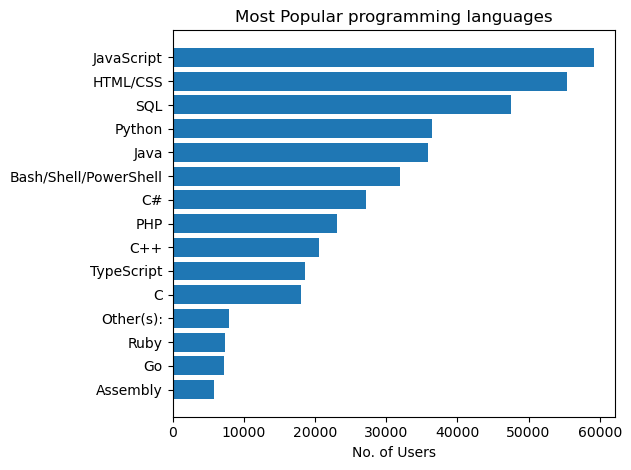

In [11]:
# let's revese the list and display the popular one at the top
languages.reverse()
popularity.reverse()

plt.barh(languages,popularity)

plt.title('Most Popular programming languages')
plt.xlabel('No. of Users')

plt.tight_layout()

plt.show()

In [12]:
data = pd.read_csv('data.csv')
data

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
...,...,...
87564,88182,HTML/CSS;Java;JavaScript
87565,88212,HTML/CSS;JavaScript;Python
87566,88282,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...
87567,88377,HTML/CSS;JavaScript;Other(s):


In [13]:
ids = data['Responder_id']
languages = data['LanguagesWorkedWith']

lang_count = Counter()

for i in languages:
    lang_count.update(i.split(';'))

lang = []
popular = []
for item in lang_count.items():
    lang.append(item[0])
    popular.append(item[1])

In [14]:
df = pd.DataFrame(data=zip(lang,popular),columns=['language','popularity'])

# display
df['% Users'] = (df['popularity']/df['popularity'].sum()).map("{:.2%}".format)

# calculation
df['User percent'] = (df['popularity']/df['popularity'].sum())*100
df

,language,popularity,% Users,User percent
0,HTML/CSS,55466,12.59%,12.591458
1,Java,35917,8.15%,8.153596
2,JavaScript,59219,13.44%,13.443434
3,Python,36443,8.27%,8.273005
4,C++,20524,4.66%,4.659198
5,C,18017,4.09%,4.090078
6,C#,27097,6.15%,6.151349
7,SQL,47544,10.79%,10.793067
8,VBA,4781,1.09%,1.085345
9,R,5048,1.15%,1.145957


In [15]:
df = df.sort_values(by='User percent',ascending=False)
df['y display'] = df['language']+'-'+df['% Users']
df

,language,popularity,% Users,User percent,y display
2,JavaScript,59219,13.44%,13.443434,JavaScript-13.44%
0,HTML/CSS,55466,12.59%,12.591458,HTML/CSS-12.59%
7,SQL,47544,10.79%,10.793067,SQL-10.79%
3,Python,36443,8.27%,8.273005,Python-8.27%
1,Java,35917,8.15%,8.153596,Java-8.15%
10,Bash/Shell/PowerShell,31991,7.26%,7.262347,Bash/Shell/PowerShell-7.26%
6,C#,27097,6.15%,6.151349,C#-6.15%
17,PHP,23030,5.23%,5.228090,PHP-5.23%
4,C++,20524,4.66%,4.659198,C++-4.66%
13,TypeScript,18523,4.20%,4.204947,TypeScript-4.20%


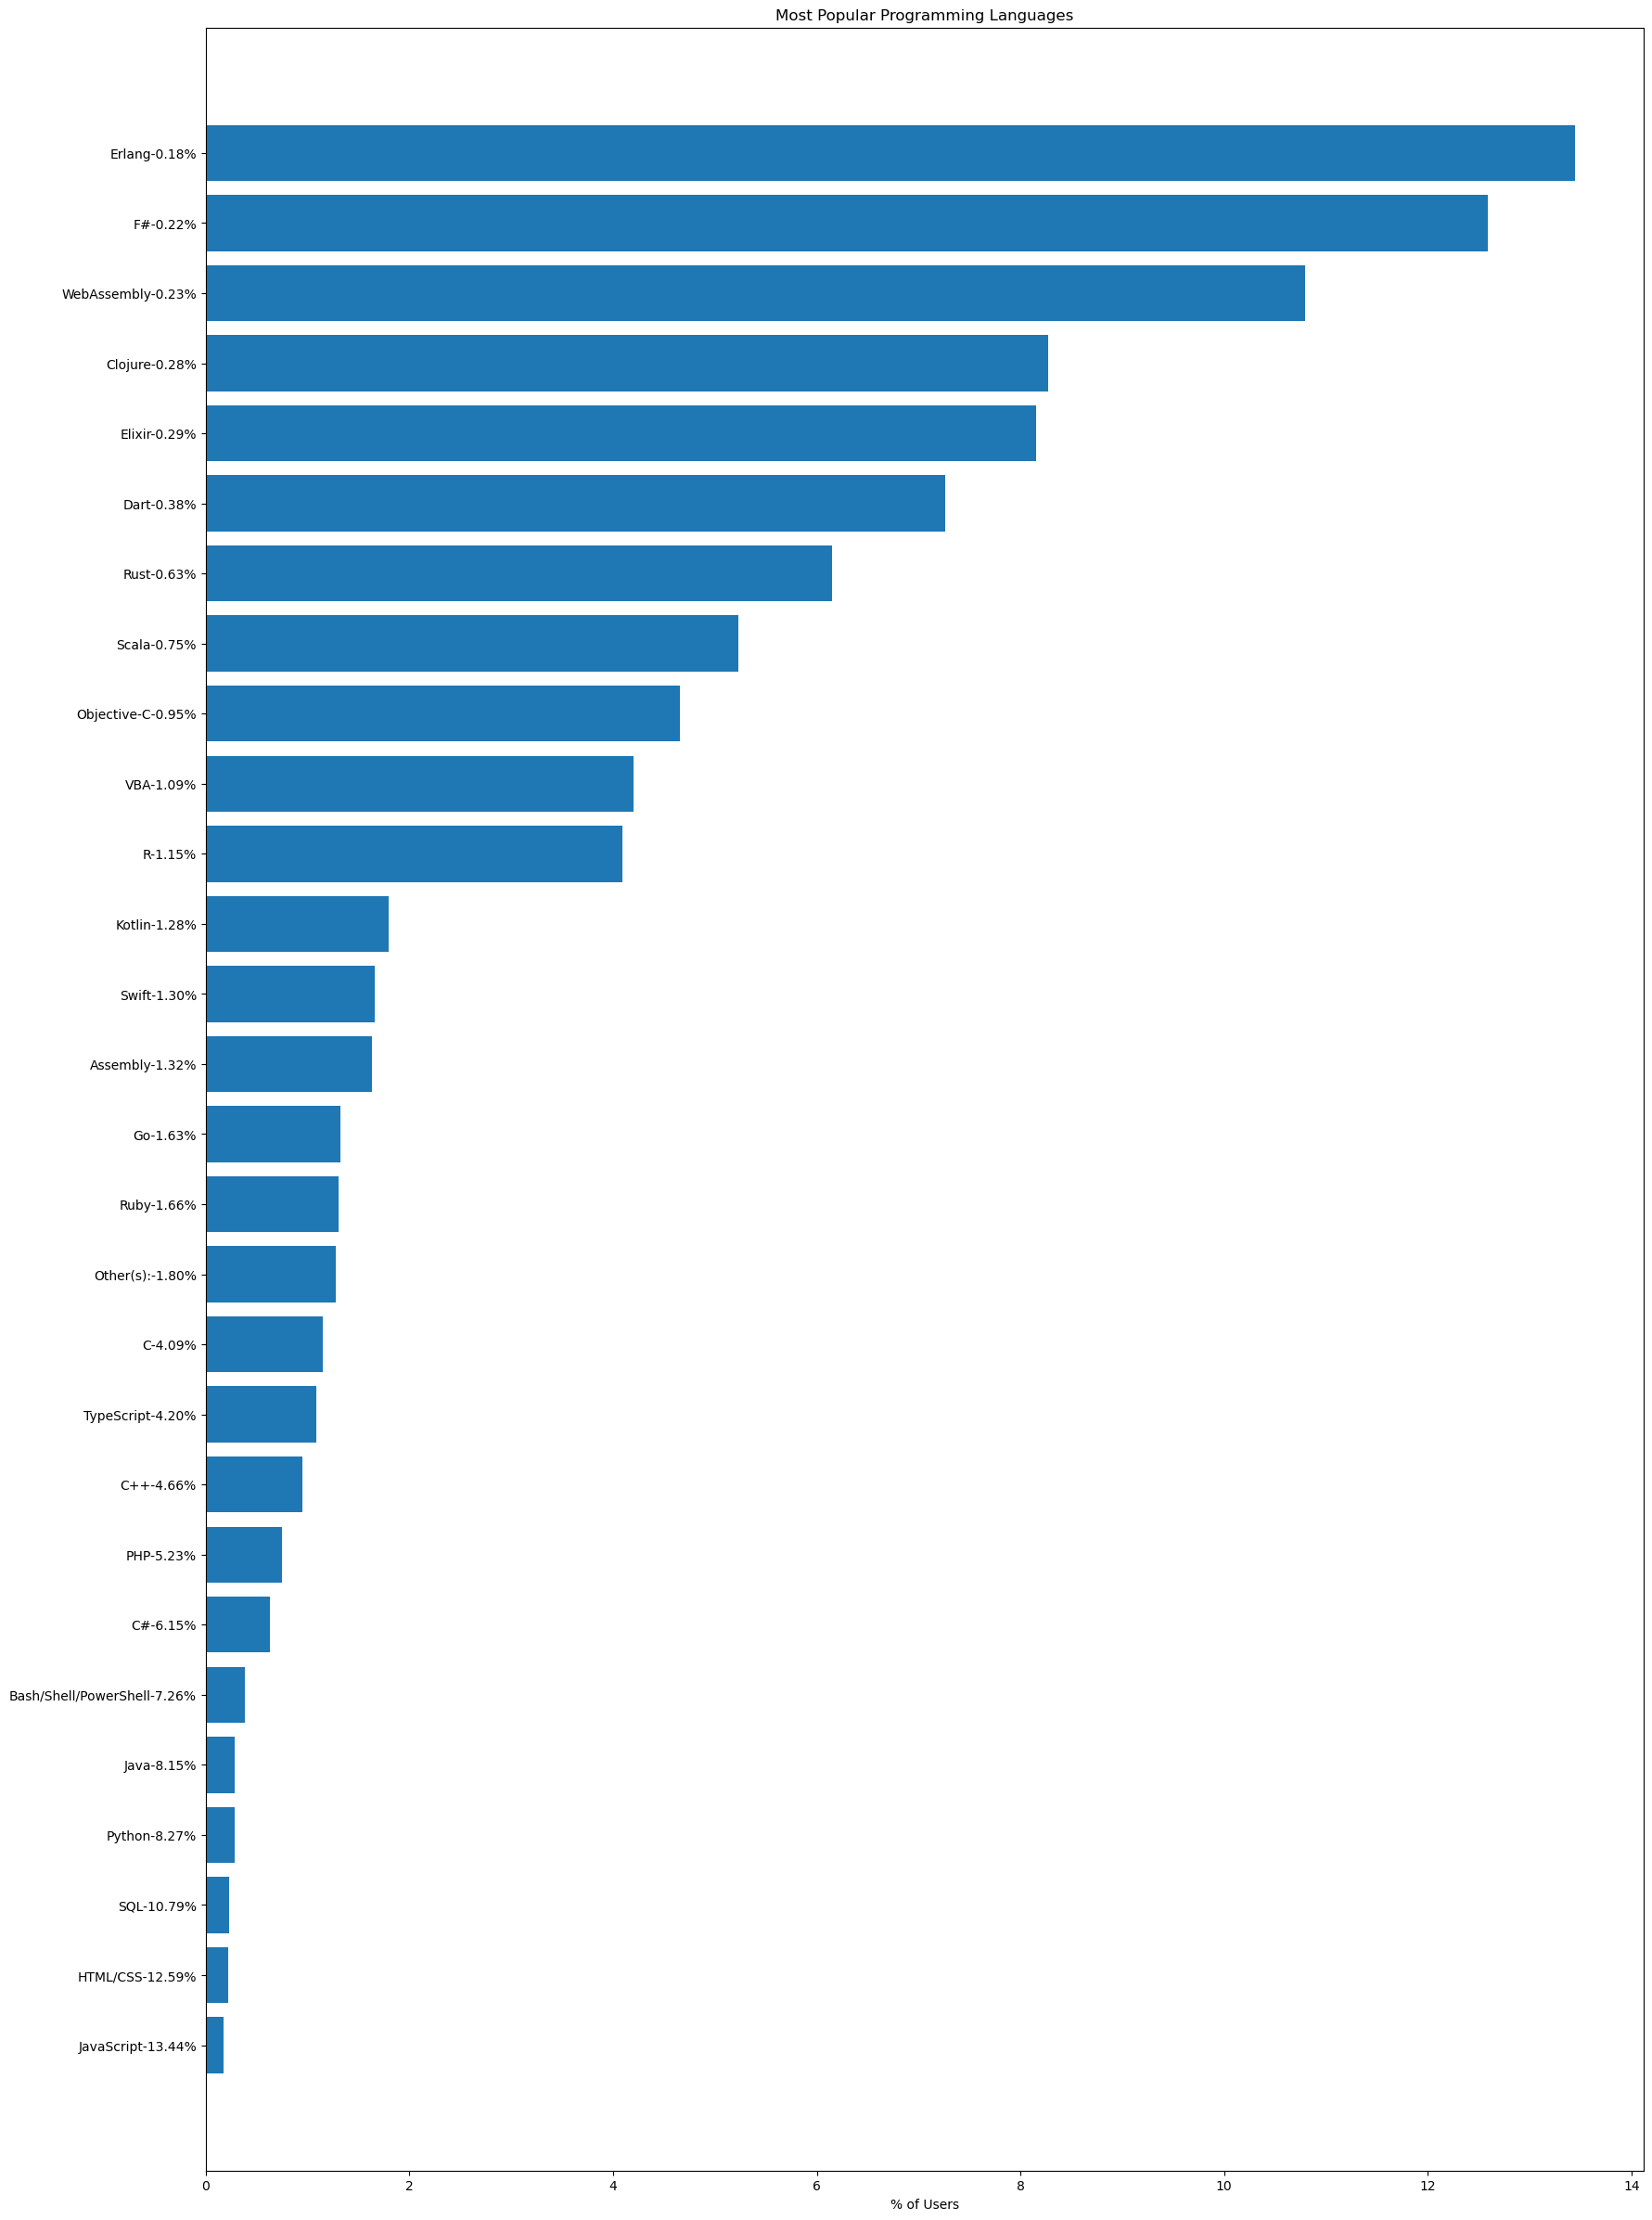

In [16]:
plt.figure(figsize=(20,30))
plt.barh(y=df['language'],width=df['User percent'].sort_values())

plt.yticks(ticks = df['language'],labels=df['y display'])
plt.title('Most Popular Programming Languages')
plt.xlabel('% of Users')

plt.show()